In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

%matplotlib inline

In [4]:
df = pd.read_csv('telco.csv')

In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
num_cols = []
categorical_cols = []

In [8]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [9]:
sort_cols(df)

In [10]:
Df = df

In [11]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])
    

In [12]:
fix_cat_cols(df,categorical_cols)

In [13]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [14]:
fix_num_cols(df,num_cols)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [16]:
df['Handset Type'].value_counts().nlargest(5)

Huawei B528S-23A           20324
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
undefined                   8987
Apple iPhone 7 (A1778)      6326
Name: Handset Type, dtype: int64

In [17]:
df['Handset Manufacturer'].value_counts().nlargest(3)

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))
col_names = ["IMSI", "MSISDN/Number","IMEI","Bearer Id","Dur. (ms)"]
df[col_names] = scaler.fit_transform(df[col_names])

In [19]:
user_per_xDR = df.groupby(['Bearer Id']).agg({'MSISDN/Number':'count'})

In [20]:
user_per_xDR_session = df.groupby(['Dur. (ms)']).agg({'MSISDN/Number':'sum'})

In [21]:
total_UL_DL_per_User = df.groupby(['Total UL (Bytes)','Total DL (Bytes)']).agg({'MSISDN/Number':'sum'})

In [22]:
df['Total_volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [23]:
Total_volume_per_user = df.groupby(['Total_volume (Bytes)']).agg({'MSISDN/Number':'sum'})

In [24]:
substring = "(Bytes)"

In [25]:

bytes_first = [j for j in df.columns if substring in j]
    
    

In [26]:
for i in  bytes_first :
    df[i.replace('(Bytes)','(MB)')] = df[i]/1000000
    df.drop(i, axis = 1, inplace = True)
    

In [27]:
relevant_cols = ['Bearer Id','Dur. (ms)','MSISDN/Number','Handset Manufacturer','Handset Type','Social Media DL (MB)','Social Media UL (MB)','Google DL (MB)','Google UL (MB)','Email DL (MB)','Email UL (MB)','Youtube DL (MB)','Youtube UL (MB)','Netflix DL (MB)','Netflix UL (MB)','Gaming DL (MB)','Gaming UL (MB)','Other DL (MB)','Other UL (MB)','Total UL (MB)','Total DL (MB)','Total_volume (MB)']

In [28]:
relevant_num = []
relevant_cat = []

In [29]:
for cols in relevant_cols:
    if df[cols].dtypes == 'object':
        relevant_cat.append(cols)
    else:
        relevant_num.append(cols)

In [30]:
for cols in relevant_num:
    print(df[cols].describe())
    print(f"Column name is {cols}")
    print(f'skewness for this column is {df[cols].skew()}')
    print(f'kurtosis for this column is {df[cols].kurtosis()}')
    Q3,Q1 = np.percentile(df[cols], [75,25])
    IQR = Q3 - Q1
    print(f'The IQR is {IQR}')
    print(f'The number of Unique value of column {cols} is : {df[cols].nunique()}')
    print('____________________________________________________________________')

count    150001.000000
mean          7.569258
std           2.299887
min           5.000000
25%           5.344828
50%           5.344828
75%           9.885057
max          10.000000
Name: Bearer Id, dtype: float64
Column name is Bearer Id
skewness for this column is 0.02675488187528529
kurtosis for this column is -1.9884731818573855
The IQR is 4.540229237831371
The number of Unique value of column Bearer Id is : 134709
____________________________________________________________________
count    150001.000000
mean          5.263111
std           0.218760
min           5.000000
25%           5.135785
50%           5.213954
75%           5.338215
max          10.000000
Name: Dur. (ms), dtype: float64
Column name is Dur. (ms)
skewness for this column is 3.9526217869211124
kurtosis for this column is 37.02245408637132
The IQR is 0.2024301989964341
The number of Unique value of column Dur. (ms) is : 89526
____________________________________________________________________
count    150001

The number of Unique value of column Other UL (MB) is : 149284
____________________________________________________________________
count    150001.000000
mean         41.121206
std          11.276349
min           2.866892
25%          33.222029
50%          41.143242
75%          49.034238
max          78.331311
Name: Total UL (MB), dtype: float64
Column name is Total UL (MB)
skewness for this column is -0.0024560080202754016
kurtosis for this column is -0.32743575750935605
The IQR is 15.812209000000003
The number of Unique value of column Total UL (MB) is : 149729
____________________________________________________________________
count    150001.000000
mean        454.643430
std         244.142061
min           7.114041
25%         243.107173
50%         455.840911
75%         665.705138
max         902.969616
Name: Total DL (MB), dtype: float64
Column name is Total DL (MB)
skewness for this column is -0.0031533741759930383
kurtosis for this column is -1.1983632207710455
The IQR i

In [31]:
for cols in relevant_cat:
    print(df[cols].describe(include=['O']))

count     150001
unique       170
top        Apple
freq       60137
Name: Handset Manufacturer, dtype: object
count               150001
unique                1396
top       Huawei B528S-23A
freq                 20324
Name: Handset Type, dtype: object


In [32]:
relevant_num.remove('MSISDN/Number')

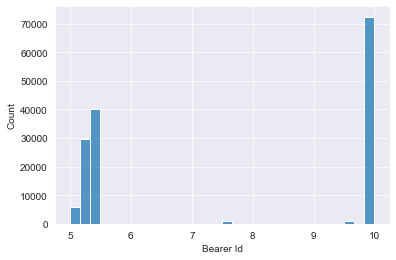

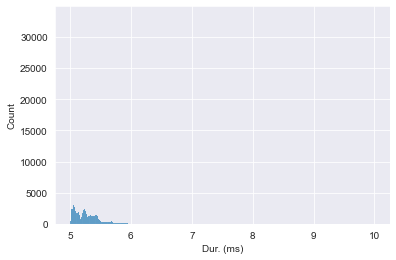

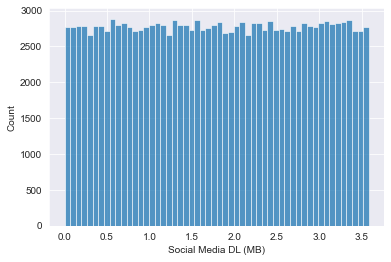

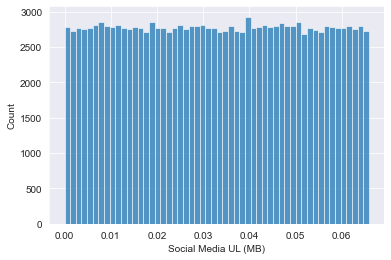

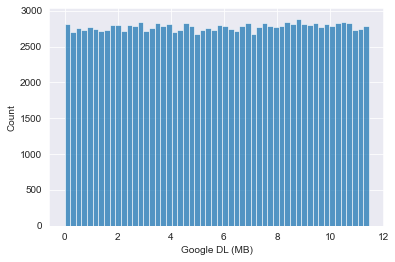

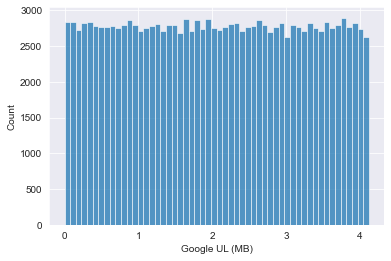

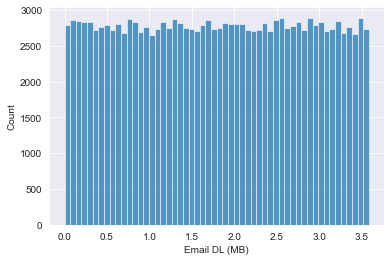

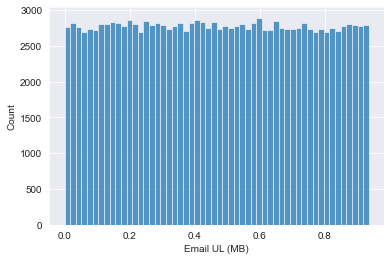

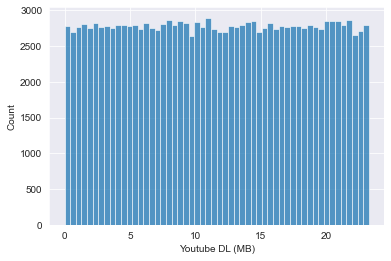

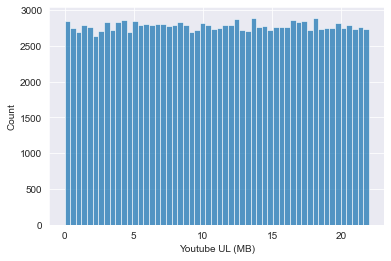

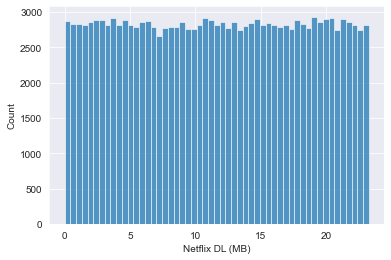

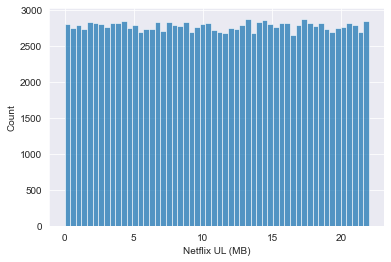

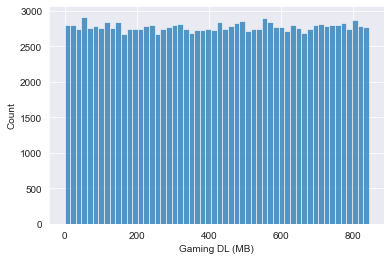

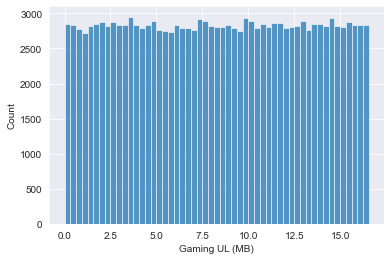

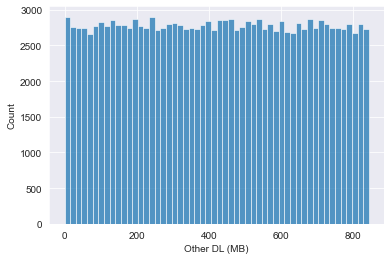

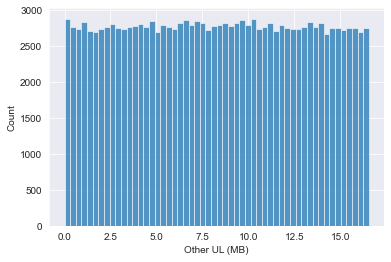

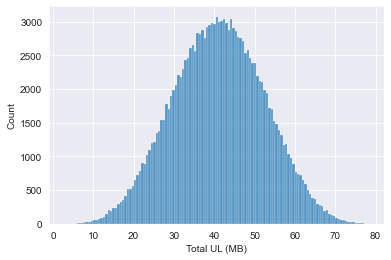

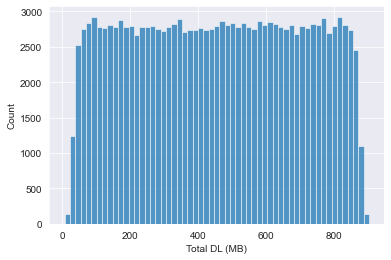

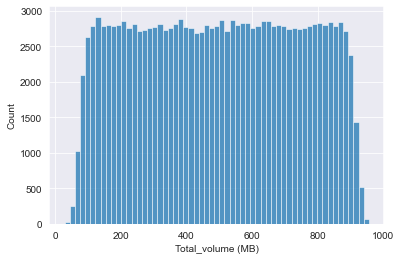

In [33]:
for cols in relevant_num:
    sns.histplot(data=df, x= cols )
    plt.show()

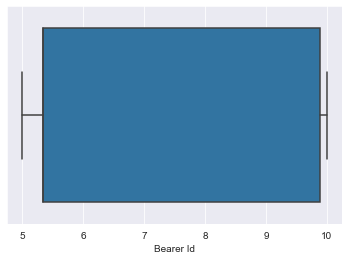

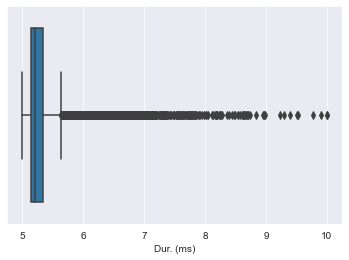

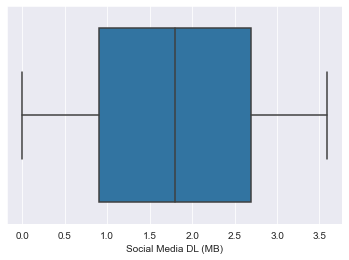

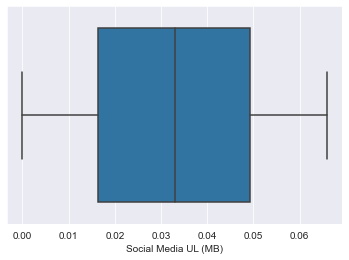

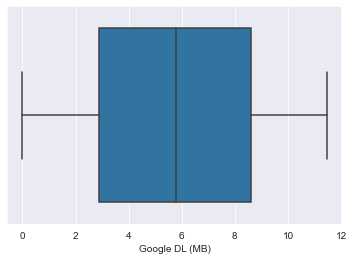

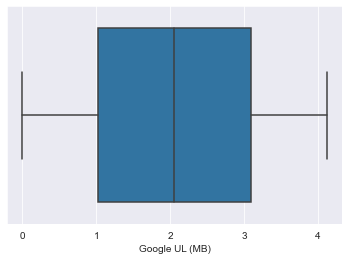

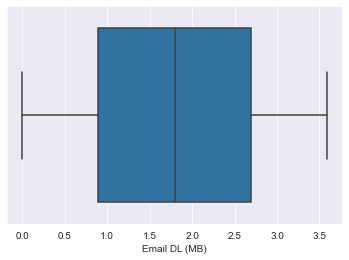

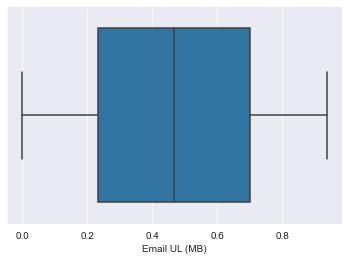

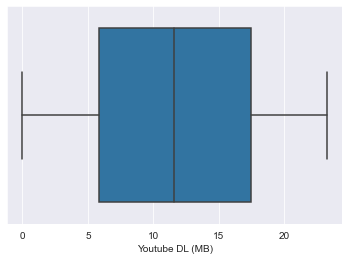

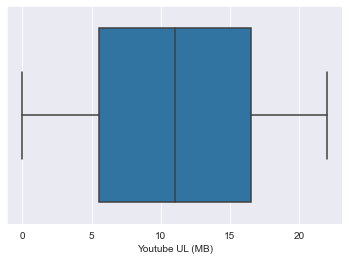

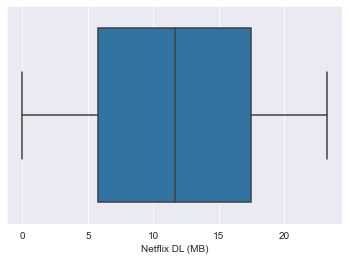

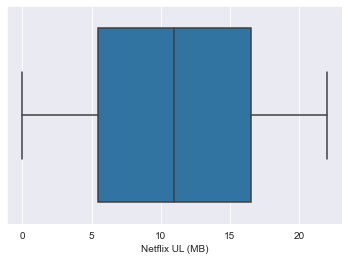

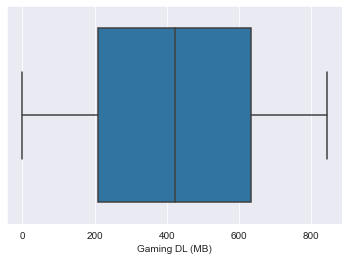

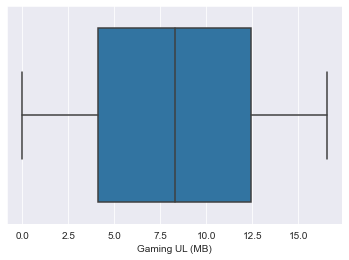

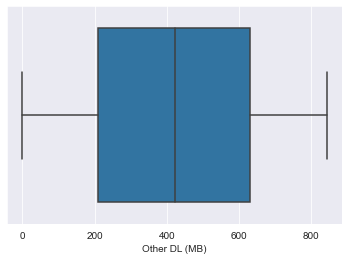

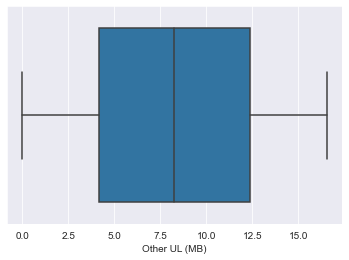

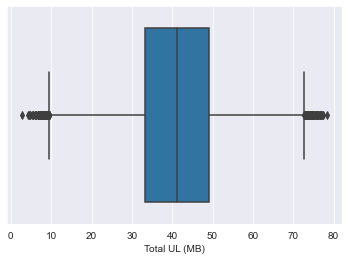

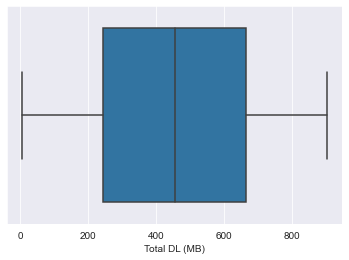

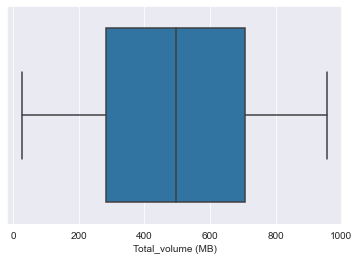

In [34]:
for cols in relevant_num:
    sns.boxplot(data=df, x= cols )
    plt.show()

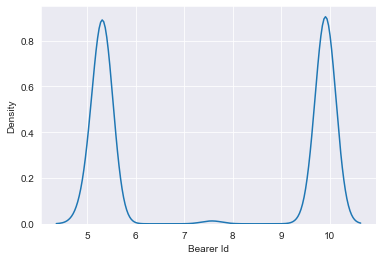

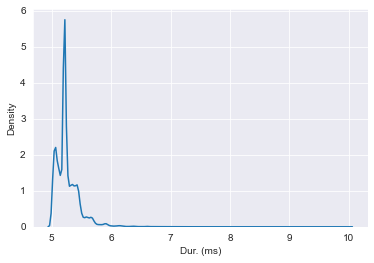

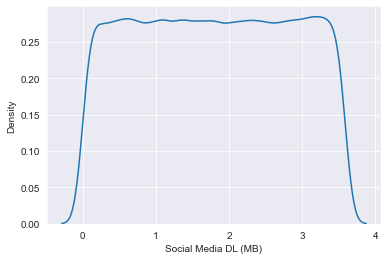

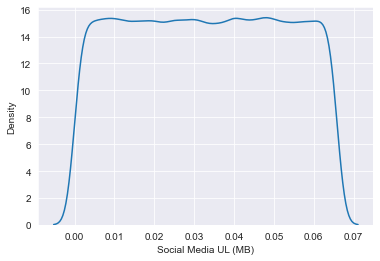

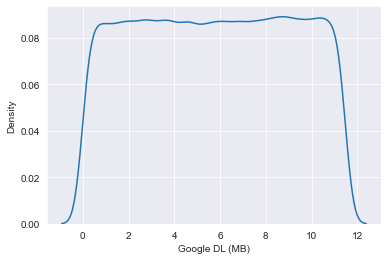

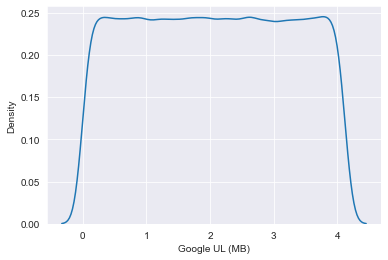

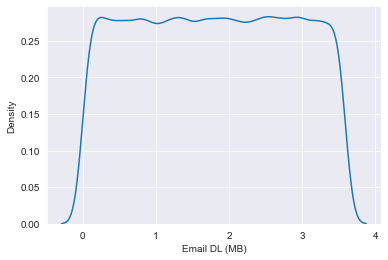

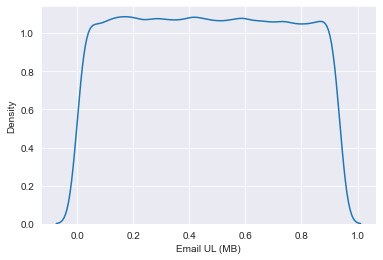

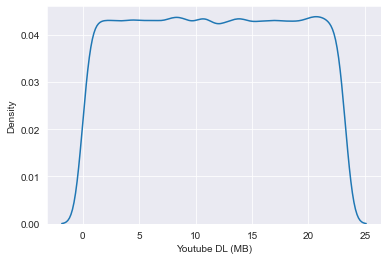

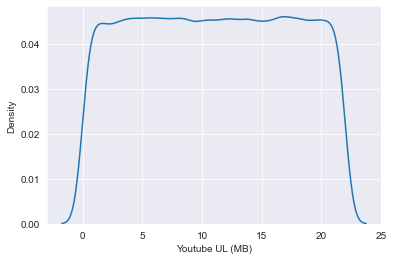

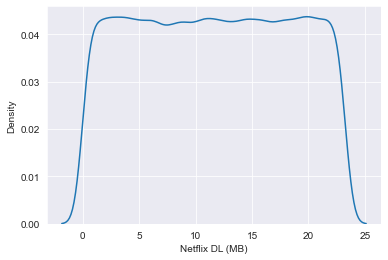

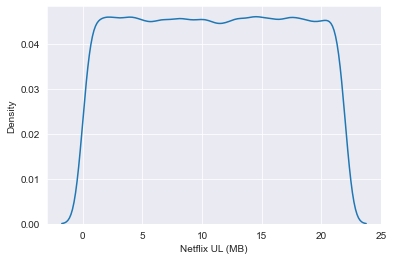

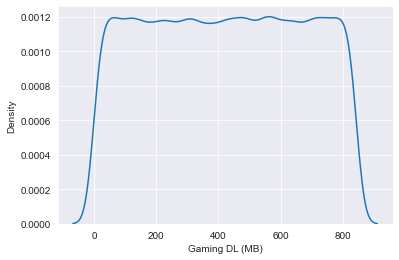

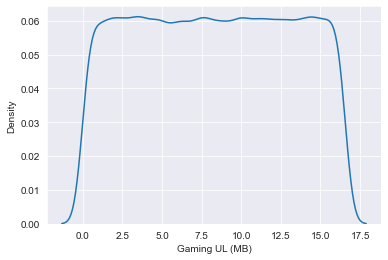

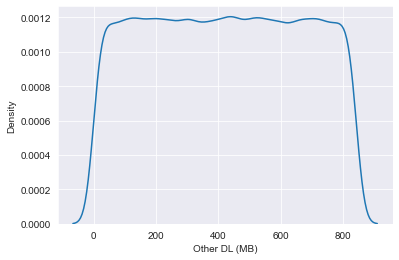

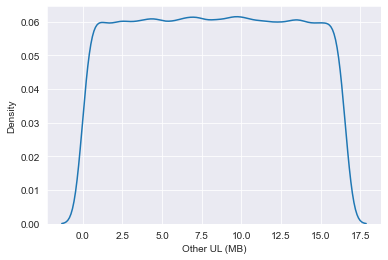

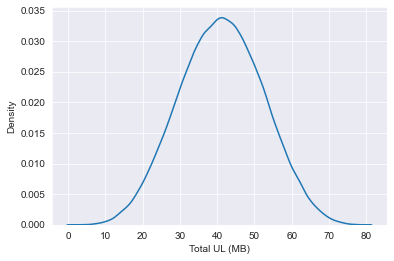

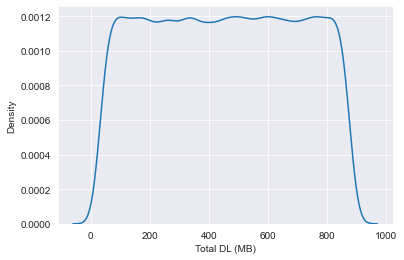

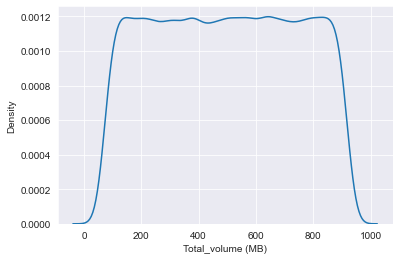

In [35]:
for cols in relevant_num:
    sns.kdeplot(data=df, x= cols )
    plt.show()

In [36]:
subs = '(MB)'

In [37]:
relevant_app = [j for j in relevant_cols if subs in j]

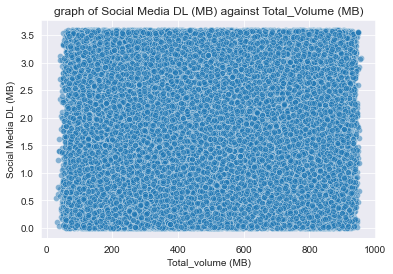

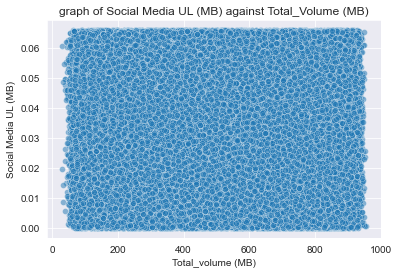

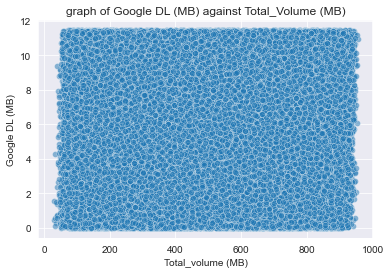

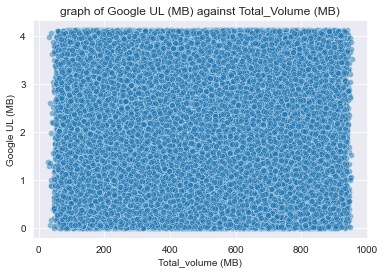

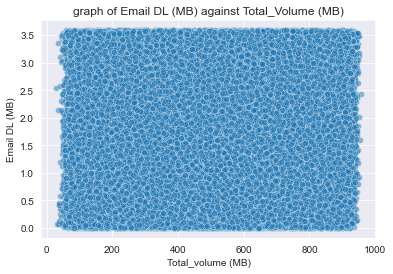

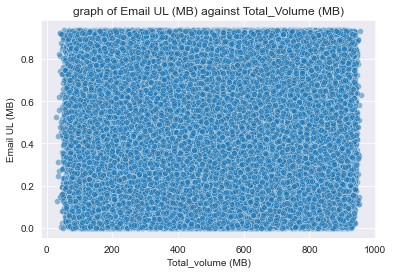

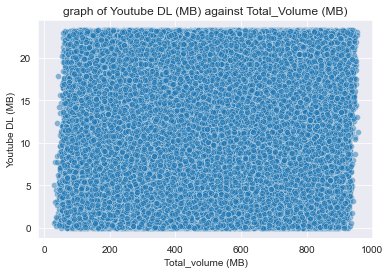

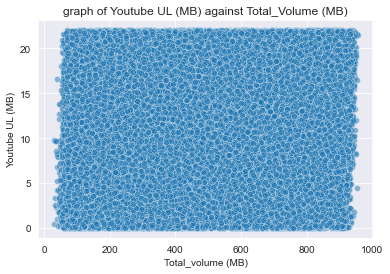

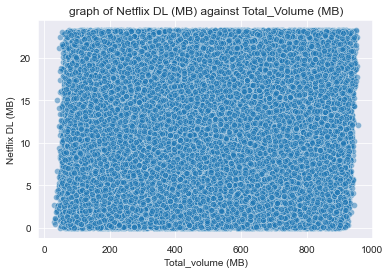

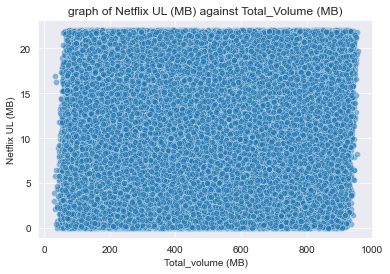

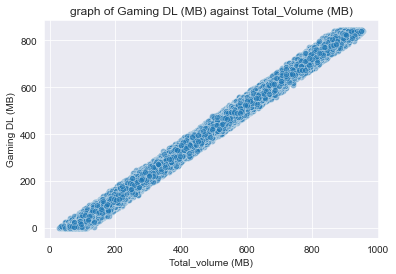

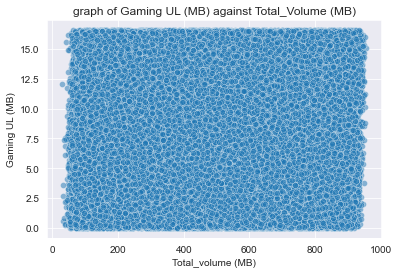

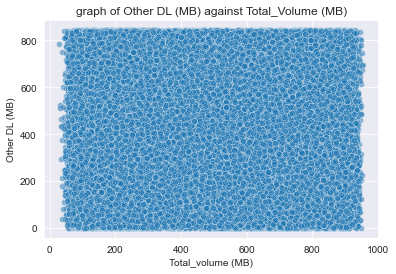

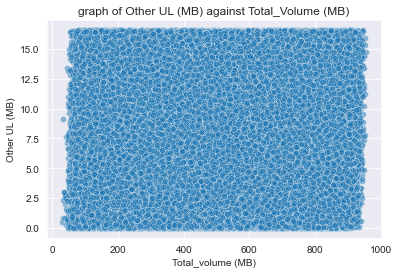

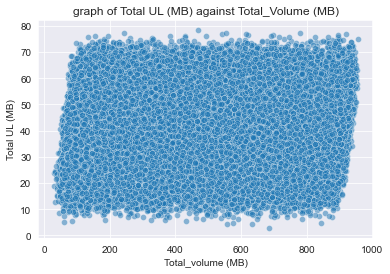

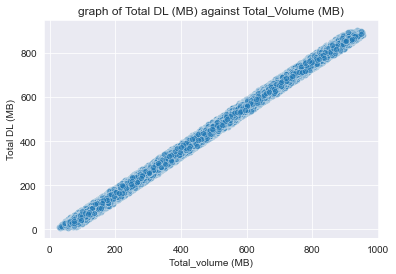

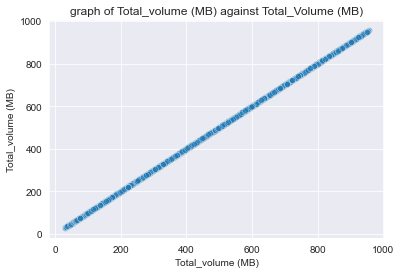

In [38]:
for i in relevant_app:
    sns.scatterplot(data=df,x='Total_volume (MB)',y=i,alpha=0.5)
    plt.title(f'graph of {i} against Total_Volume (MB)')
    plt.xlabel("Total_volume (MB)")
    plt.ylabel(i)
    plt.show()

In [39]:
df['top_5_decile_Dur. (MS)'] = pd.qcut(df['Dur. (ms)'], 10,labels=False,duplicates= 'drop')

In [40]:
top_5s = []

In [41]:
New_df = pd.DataFrame()
New_df['total_data_UL+DL'] = df['Total_volume (MB)']
New_df['MSISDN/Number'] = df['MSISDN/Number']
New_df['top_5_decile_Dur. (MS)'] = df['top_5_decile_Dur. (MS)']

new_df = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==3,:]
new_df1 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==2,:]
new_df2 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==0,:]
new_df3 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==8,:]
new_df4 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==7,:]

new_df = pd.DataFrame(new_df.reset_index())
new_df1 = pd.DataFrame(new_df1.reset_index())
new_df2 = pd.DataFrame(new_df2.reset_index())
new_df3 = pd.DataFrame(new_df3.reset_index())
new_df4 = pd.DataFrame(new_df4.reset_index())



top_5s.append(new_df)
top_5s.append(new_df1)
top_5s.append(new_df2)
top_5s.append(new_df3)
top_5s.append(new_df4)

top_5s = pd.concat(top_5s,axis=0)

top_5s.drop("index",axis=1,inplace=True)

In [42]:
df['top_5_decile_Dur. (MS)'].value_counts()

3    32700
2    15003
0    15002
8    15000
7    15000
6    15000
5    14999
1    14999
4    12298
Name: top_5_decile_Dur. (MS), dtype: int64

In [43]:
top_5s

,total_data_UL+DL,MSISDN/Number,top_5_decile_Dur. (MS)
0,157.443543,5.000047,3
1,659.160628,5.000001,3
2,549.853042,5.000000,3
3,460.885620,5.000000,3
4,76.046037,5.000000,3
...,...,...,...
14995,320.540401,5.000000,7
14996,427.883193,5.000001,7
14997,185.829404,5.000000,7
14998,332.682924,5.000000,7


In [44]:
top_5s['top_5_decile_Dur. (MS)'].value_counts()

3    32700
2    15003
0    15002
8    15000
7    15000
Name: top_5_decile_Dur. (MS), dtype: int64

In [45]:
df_data = pd.DataFrame()

df_data['Social Media data'] = df['Social Media DL (MB)'] + df['Social Media UL (MB)']
df_data['Google data'] = df['Google DL (MB)'] + df['Google UL (MB)']
df_data['Email data'] = df['Email DL (MB)'] + df['Email UL (MB)']
df_data['Youtube data'] = df['Youtube DL (MB)'] + df['Youtube UL (MB)']
df_data['Netflix data'] = df['Netflix DL (MB)'] + df['Netflix UL (MB)']
df_data['Gaming data'] = df['Gaming DL (MB)'] + df['Gaming UL (MB)']
df_data['Other data'] = df['Other DL (MB)'] + df['Other UL (MB)']

In [46]:
df_data.corr()

,Social Media data,Google data,Email data,Youtube data,Netflix data,Gaming data,Other data
Social Media data,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
Google data,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
Email data,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
Youtube data,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
Netflix data,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
Gaming data,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
Other data,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


In [47]:
from sklearn.preprocessing import StandardScaler
Df.drop(categorical_cols, axis=1, inplace=True)
Df = StandardScaler().fit_transform(Df)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Df)
principalDf = pd.DataFrame(data= principalComponents,columns = ['principal component 1', 'principal component 2'])

In [50]:
principalDf

,principal component 1,principal component 2
0,-4.199082,18.610850
1,-3.391302,13.784947
2,-3.402834,13.904078
3,-3.366692,13.300702
4,-2.955953,11.014641
...,...,...
149996,-1.226823,-0.146474
149997,-1.318878,0.347304
149998,-1.243666,0.392718
149999,-0.835833,0.420658
